In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Employee.csv")

In [3]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## Data exploration
### Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.

In [4]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [5]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [7]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [8]:
df.describe(include='object')

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


In [9]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [10]:
df.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [11]:
for column in df.columns:
    unique_values = df[column].unique()  
    num_unique = df[column].nunique()    # Get the number of unique values
    
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {num_unique}")
    print("-" * 40) 

Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 6
----------------------------------------
Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 29
----------------------------------------
Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 40
----------------------------------------
Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 11
----------------------------------------
Column: Country
Unique Values: ['I

## Data Cleaning:
Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers  

In [12]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

#### Replace the value 0 in Age as NaN.

In [13]:
df['Age'].replace(0,np.nan,inplace=True)
df

C:\Users\User\AppData\Local\Temp\ipykernel_11572\1957623250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(0,np.nan,inplace=True)


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [14]:
df.loc[df['Age']==0,'Age']

Series([], Name: Age, dtype: float64)

#### Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode).

In [15]:
df.fillna({'Age':df['Age'].mean(),'Salary':df['Salary'].median()},inplace=True)   #fil missing values in age with mean and salary with median

In [16]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [17]:
# drop duplicate values
df.drop_duplicates(inplace=True)
df.shape

(144, 6)

In [18]:
# find the outliers
from scipy import stats
# Calculate Z-scores
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))  # Apply to numeric columns

# Create a DataFrame with Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = (z_scores_df.abs() > 3).any(axis=1)

# Filter outliers
outlier_data = df[outliers]

print(outlier_data)


Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender]
Index: []


<Axes: >

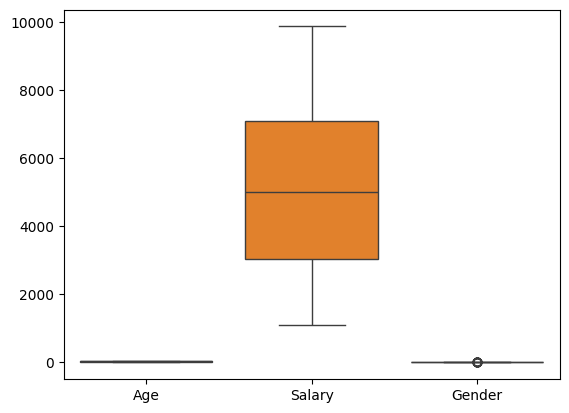

In [19]:
sns.boxplot(df)

## Data Analysis

In [20]:
# Filter the data with age >40 and salary<500.
df1=df[(df['Age']>40) & (df['Salary']<5000)]
df1

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


Text(0.5, 1.0, 'Age vs Salary')

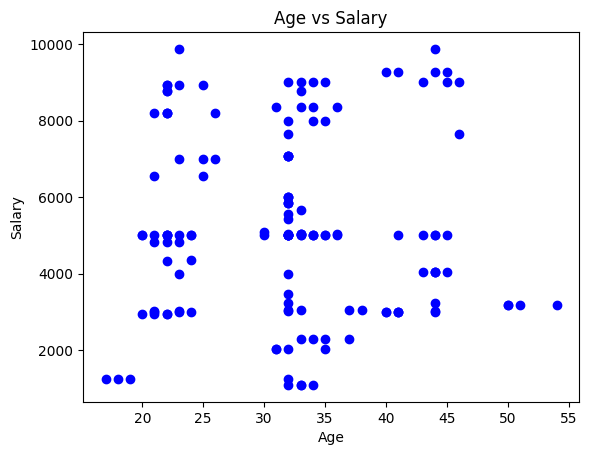

In [21]:
# Plot the chart with age and salary.
plt.scatter(df['Age'],df['Salary'],color='blue')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')


In [22]:
# Count the number of people from each place and represent it visually
no_of_peoples=df['Place'].value_counts()
no_of_peoples

Place
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

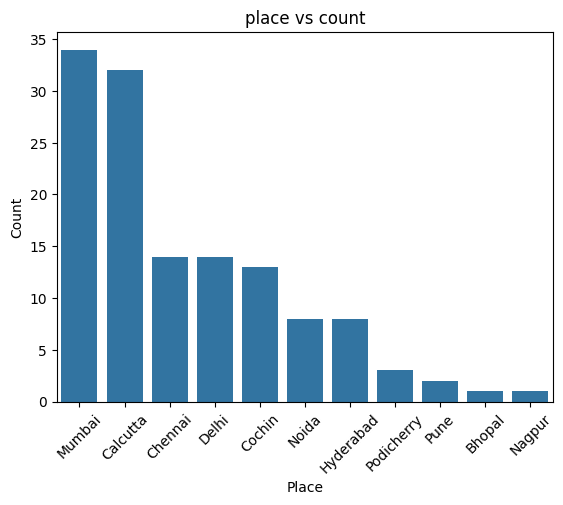

In [23]:
sns.barplot(x=no_of_peoples.index,y=no_of_peoples.values)
plt.xlabel("Place")
plt.ylabel("Count")
plt.title("place vs count")
plt.xticks(rotation=45)
plt.show()

## Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [24]:
data=df.copy()

In [25]:
# One-Hot Encoding using get_dummies
encoded_df1=pd.get_dummies(df, columns=['Company','Place','Country'])
encoded_df1

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,...,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,20.0,5000.0,0,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,30.0,5000.0,0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,35.0,2300.0,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.0,0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,23.0,4000.0,0,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.0,0,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
143,33.0,9024.0,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
145,44.0,4034.0,1,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
146,33.0,5034.0,1,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [26]:
# Encoding using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Company_Encoded'] = le.fit_transform(df['Company'])
df['Place_Encoded'] = le.fit_transform(df['Place'])
df['Country_Encoded'] = le.fit_transform(df['Country'])
print(df)
    

             Company   Age  Salary     Place Country  Gender  Company_Encoded  \
0                TCS  20.0  5000.0   Chennai   India       0                4   
1            Infosys  30.0  5000.0    Mumbai   India       0                2   
2                TCS  35.0  2300.0  Calcutta   India       0                4   
3            Infosys  40.0  3000.0     Delhi   India       0                2   
4                TCS  23.0  4000.0    Mumbai   India       0                4   
..               ...   ...     ...       ...     ...     ...              ...   
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai   India       0                3   
143              TCS  33.0  9024.0  Calcutta   India       1                4   
145          Infosys  44.0  4034.0     Delhi   India       1                2   
146              TCS  33.0  5034.0    Mumbai   India       1                4   
147          Infosys  22.0  8202.0    Cochin   India       0                2   

     Place_Encoded  Country

In [31]:
# numerical dataset
num_df=df.select_dtypes(include=['int64', 'float64'])
num_df.head()

,Age,Salary,Gender,Company_Encoded,Place_Encoded,Country_Encoded
0,20.0,5000.0,0,4,2,0
1,30.0,5000.0,0,2,6,0
2,35.0,2300.0,0,4,1,0
3,40.0,3000.0,0,2,4,0
4,23.0,4000.0,0,4,6,0


In [32]:
from sklearn.model_selection import train_test_split
X=num_df.drop("Salary",axis=1)
y=df['Salary']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train)
print(X_test)

           Age  Gender  Company_Encoded  Place_Encoded  Country_Encoded
125  33.000000       1                4             11                0
31   20.000000       0                0              6                0
99   44.000000       1                0              9                0
36   32.000000       0                4              8                0
16   23.000000       0                2              9                0
..         ...     ...              ...            ...              ...
71   34.000000       1                4              6                0
107  31.959677       1                4              2                0
14   40.000000       0                2              1                0
93   54.000000       0                2              6                0
103  22.000000       0                0              1                0

[115 rows x 5 columns]
           Age  Gender  Company_Encoded  Place_Encoded  Country_Encoded
118  22.000000       0                0 

In [33]:
print(y_train)
print(y_test)

125    5654.0
31     2934.0
99     9284.0
36     5000.0
16     3030.0
        ...  
71     9024.0
107    9024.0
14     3000.0
93     3184.0
103    2934.0
Name: Salary, Length: 115, dtype: float64
118    5000.0
19     5000.0
82     5000.0
98     8345.0
56     3045.0
12     5000.0
135    9284.0
65     2034.0
66     5000.0
18     5000.0
51     3000.0
78     6000.0
95     5835.0
136    5000.0
101    2034.0
64     6543.0
27     9284.0
69     5034.0
126    5009.0
73     5000.0
11     1089.0
120    5000.0
111    3234.0
114    5555.0
55     7654.0
45     9000.0
9      9000.0
4      4000.0
26     8345.0
Name: Salary, dtype: float64


## Feature Scaling:
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
print("Standard Scaled X_train:\n", X_train_ss)
print("Standard Scaled X_test:\n", X_test_ss)

Standard Scaled X_train:
 [[ 0.14447994  1.85015592  0.84426236  1.99922805  0.        ]
 [-1.41298311 -0.54049499 -1.52379059  0.43093865  0.        ]
 [ 1.4623333   1.85015592 -1.52379059  1.37191229  0.        ]
 [ 0.02467509 -0.54049499  0.84426236  1.05825441  0.        ]
 [-1.05356856 -0.54049499 -0.33976412  1.37191229  0.        ]
 [-1.05356856 -0.54049499 -1.52379059  0.43093865  0.        ]
 [-1.17337341 -0.54049499  0.84426236 -1.13735075  0.        ]
 [-1.17337341 -0.54049499  0.84426236 -0.51003499  0.        ]
 [ 0.01984425 -0.54049499  0.84426236  1.99922805  0.        ]
 [ 0.14447994 -0.54049499 -1.52379059  1.05825441  0.        ]
 [ 0.14447994 -0.54049499  0.84426236  0.11728077  0.        ]
 [-1.17337341  1.85015592 -0.33976412 -1.13735075  0.        ]
 [ 0.01984425 -0.54049499  0.84426236 -1.13735075  0.        ]
 [-1.41298311 -0.54049499  0.84426236 -0.82369287  0.        ]
 [-1.77239766 -0.54049499 -1.52379059 -1.13735075  0.        ]
 [-1.05356856  1.85015592 -1.

In [35]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_mmscaled = mm.fit_transform(X_train)
X_test_mmscaled = mm.transform(X_test)
print("MinMax Scaled X_train Data:\n", X_train_mmscaled)
print("MinMax Scaled X_test Data:\n", X_test_mmscaled)

MinMax Scaled X_train Data:
 [[0.43243243 1.         0.66666667 1.         0.        ]
 [0.08108108 0.         0.         0.54545455 0.        ]
 [0.72972973 1.         0.         0.81818182 0.        ]
 [0.40540541 0.         0.66666667 0.72727273 0.        ]
 [0.16216216 0.         0.33333333 0.81818182 0.        ]
 [0.16216216 0.         0.         0.54545455 0.        ]
 [0.13513514 0.         0.66666667 0.09090909 0.        ]
 [0.13513514 0.         0.66666667 0.27272727 0.        ]
 [0.40431561 0.         0.66666667 1.         0.        ]
 [0.43243243 0.         0.         0.72727273 0.        ]
 [0.43243243 0.         0.66666667 0.45454545 0.        ]
 [0.13513514 1.         0.33333333 0.09090909 0.        ]
 [0.40431561 0.         0.66666667 0.09090909 0.        ]
 [0.08108108 0.         0.66666667 0.18181818 0.        ]
 [0.         0.         0.         0.09090909 0.        ]
 [0.16216216 1.         0.         0.54545455 0.        ]
 [0.18918919 0.         0.66666667 0.090909